In [3]:

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv("Algerian_forest_fires_dataset.csv")

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [6]:
df["Classes_cat"] = df["Classes  "].str.strip()
df["Classes_cat"]

0      not fire
1      not fire
2      not fire
3      not fire
4      not fire
         ...   
238        fire
239    not fire
240    not fire
241    not fire
242    not fire
Name: Classes_cat, Length: 243, dtype: object

In [7]:
df["Classes_cat"]=df["Classes_cat"].str.replace("not fire", str('1'))

In [8]:
df["Classes_cat"]=df["Classes_cat"].str.replace("fire", str('0'))

In [9]:
df["Classes_cat"]

0      1
1      1
2      1
3      1
4      1
      ..
238    0
239    1
240    1
241    1
242    1
Name: Classes_cat, Length: 243, dtype: object

In [10]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Classes_cat'],
      dtype='object')

In [11]:
df_copy = df.drop(['day','month','year','Classes  '], axis=1)

In [12]:
df_copy.columns

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes_cat'],
      dtype='object')

In [13]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_cat
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1


E:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

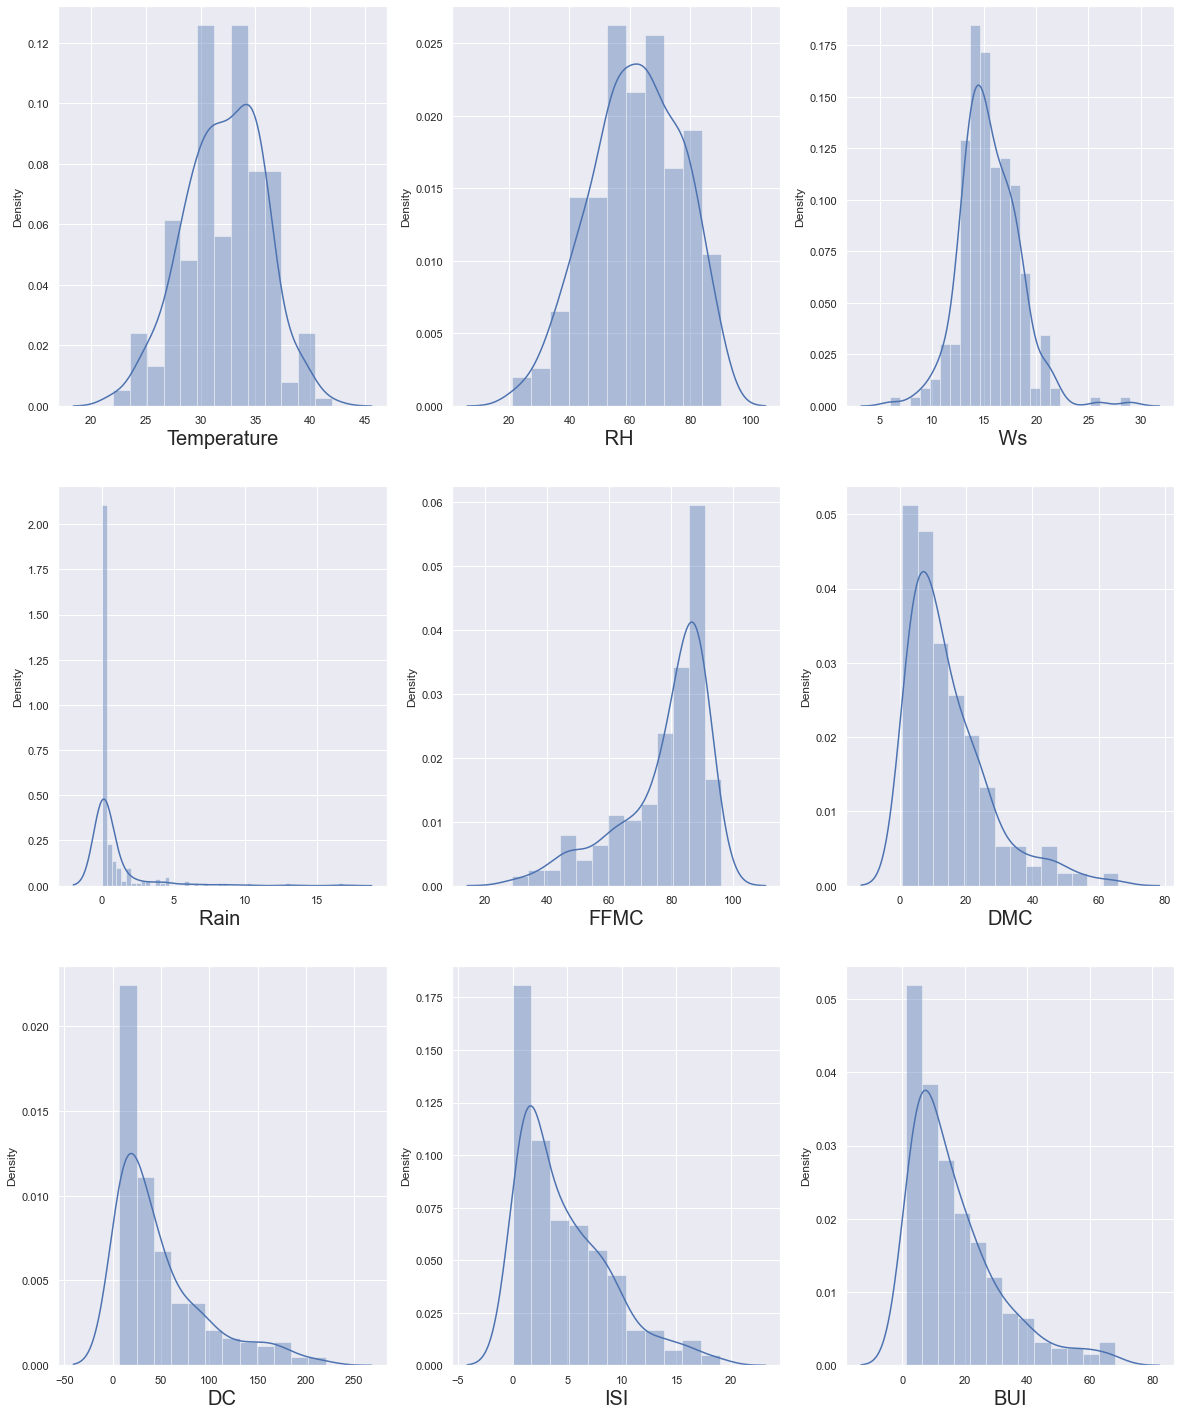

In [14]:
## Data distribution for each column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_copy:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_copy[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

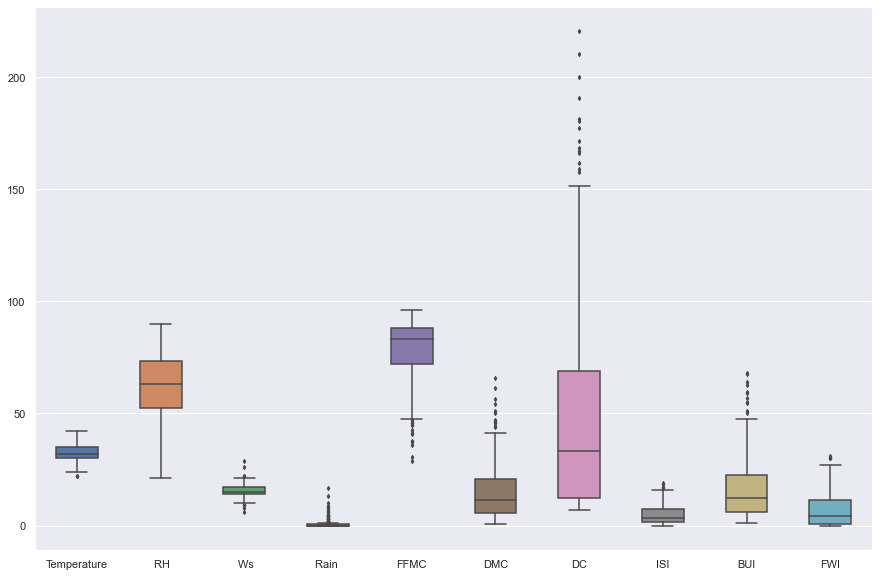

In [35]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df_copy, width= 0.5,ax=ax,  fliersize=3)

In [15]:
q = df_copy['Temperature'].quantile(0.2)
# we are removing the bottom 2% data from the Temperature column
df_copy_cleaned = df_copy[df_copy['Temperature']>q]

q = df_copy[' Ws'].quantile(0.98)
# we are removing the top 2% data from the Ws column
df_copy_cleaned = df_copy[df_copy[' Ws']<q]

q = df_copy['Rain '].quantile(0.98)
# we are removing the top 2% data from the Rain column
df_copy_cleaned = df_copy[df_copy['Rain ']<q]

q = df_copy['FFMC'].quantile(0.5)
# we are removing the bottom 5% data from the FFMC column
df_copy_cleaned = df_copy[df_copy['FFMC']>q]

q = df_copy['DMC'].quantile(0.95)
# we are removing the top 5% data from the DMC column
df_copy_cleaned = df_copy[df_copy['DMC']<q]

q = df_copy['DC'].quantile(0.95)
# we are removing the top 5% data from the DC column
df_copy_cleaned = df_copy[df_copy['DC']<q]

q = df_copy['BUI'].quantile(0.95)
# we are removing the top 5% data from the BUI column
df_copy_cleaned = df_copy[df_copy['BUI']<q]

q = df_copy['ISI'].quantile(0.99)
# we are removing the top 1% data from the ISI column
df_copy_cleaned = df_copy[df_copy['ISI']<q]

E:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

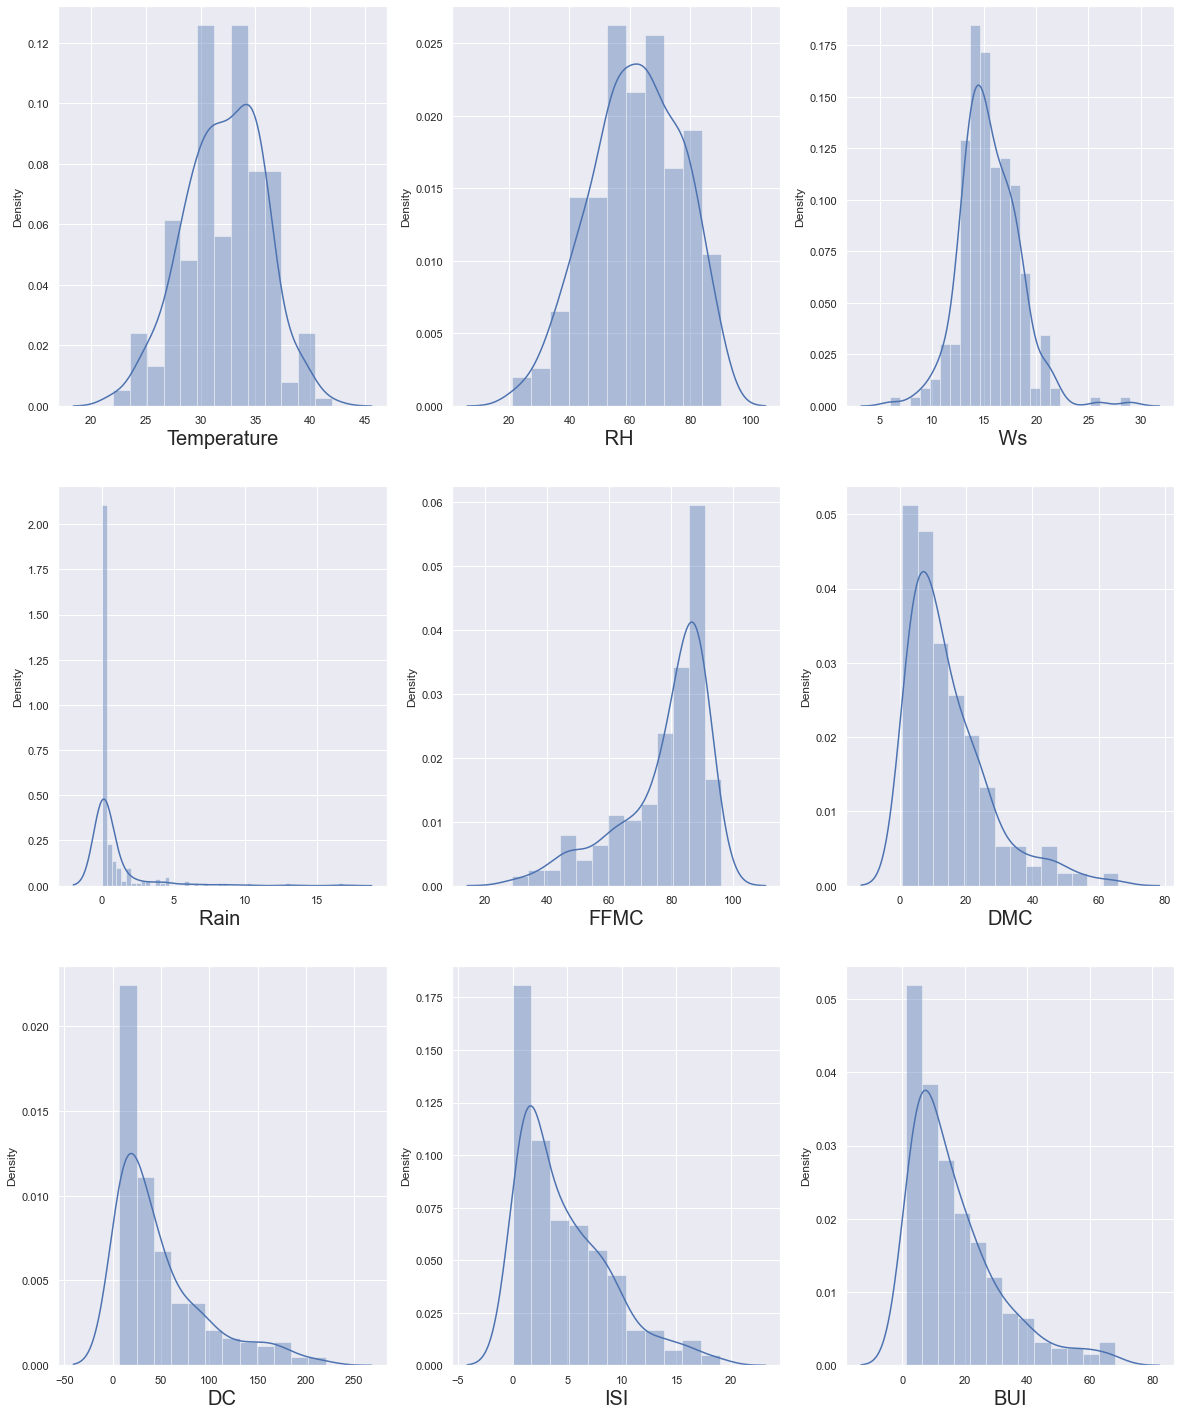

In [16]:
## Data distribution for each column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_copy:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_copy[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [18]:
X = df_copy.drop(columns = ['Classes_cat'])
y = df_copy['Classes_cat']

E:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarnin

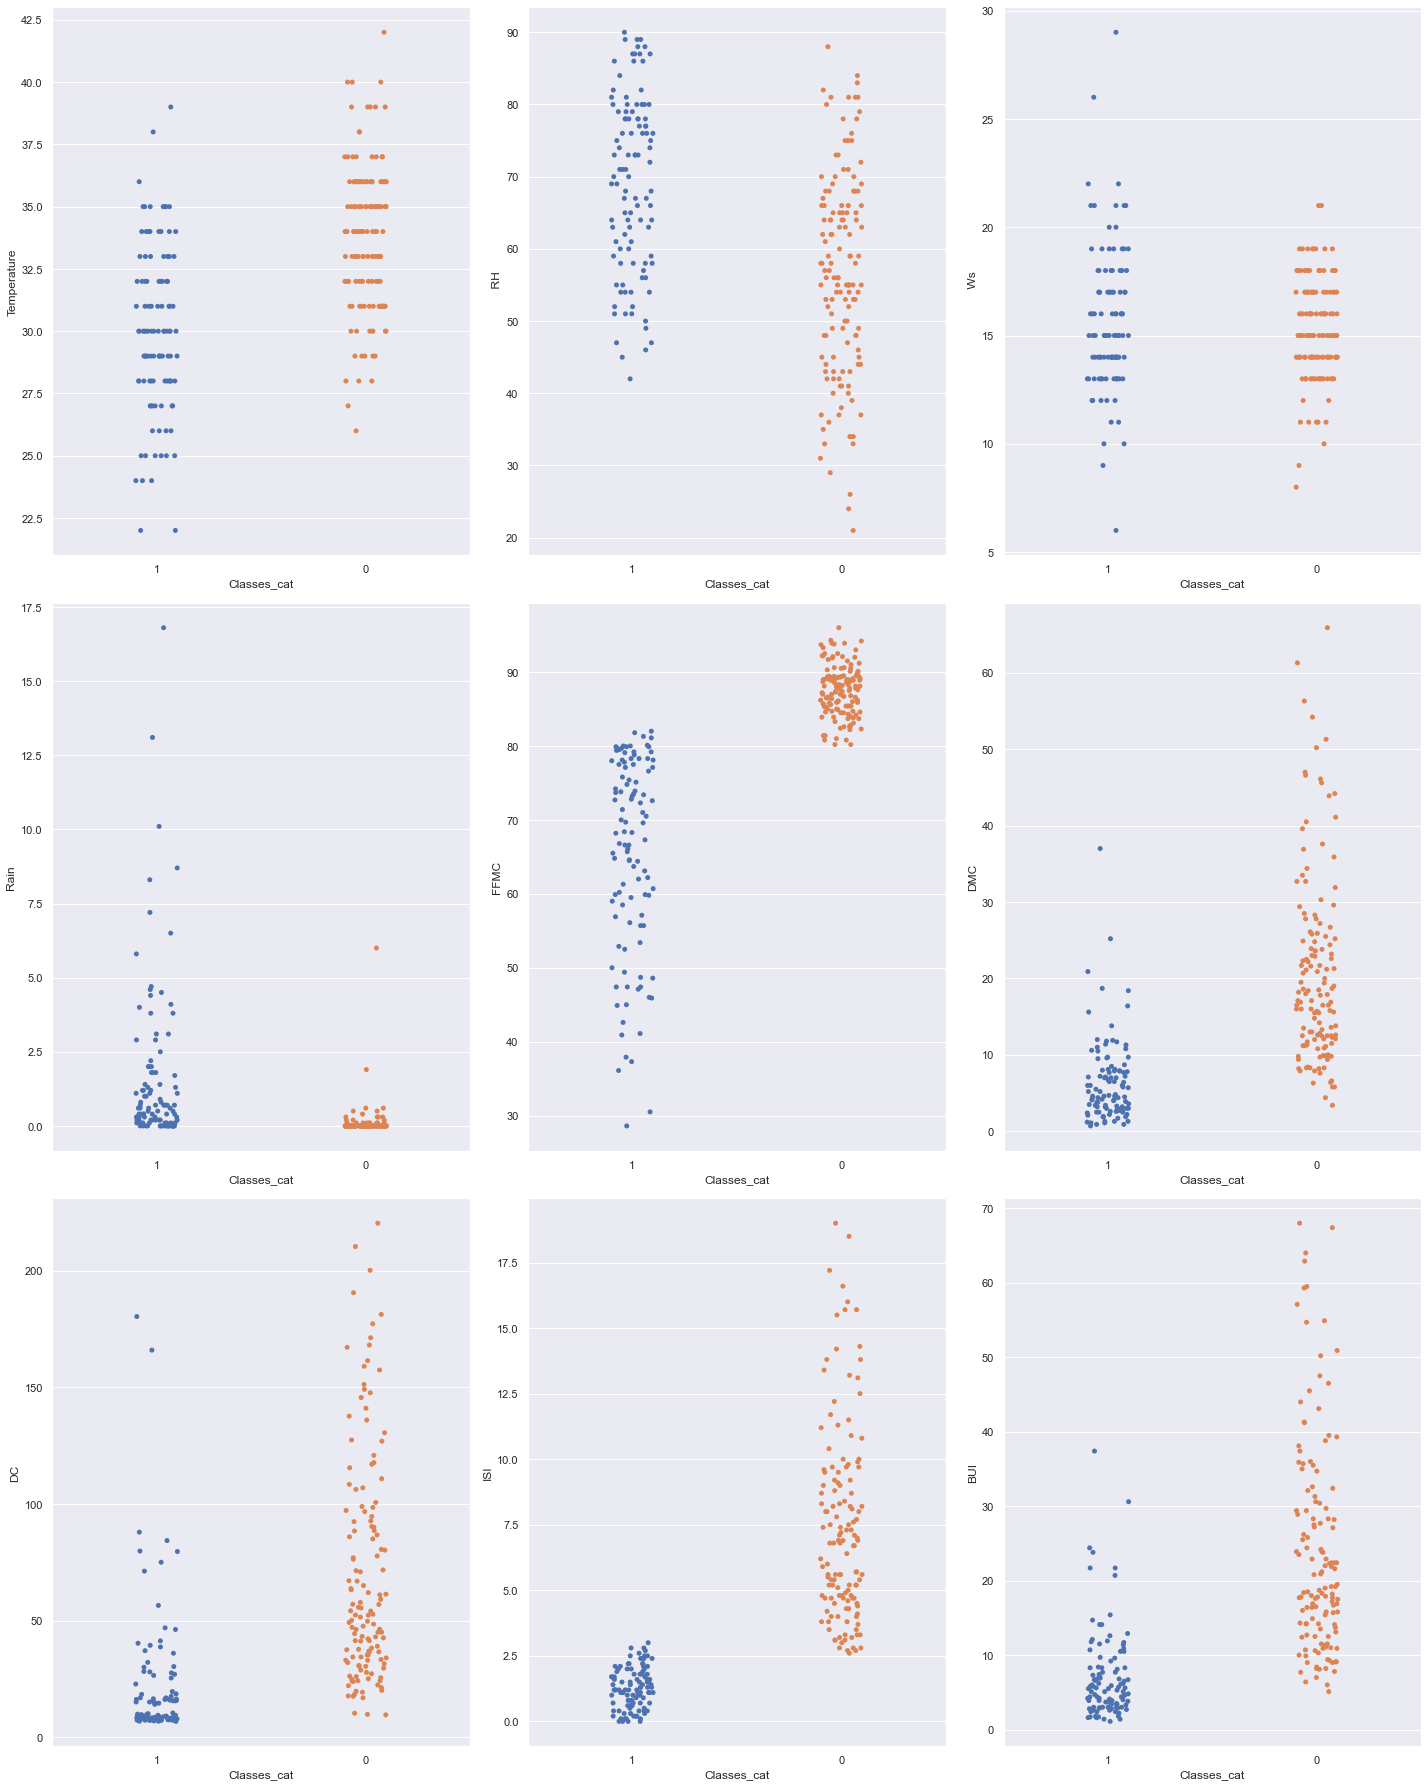

In [19]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [20]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [21]:
X_scaled

array([[-0.87065469, -0.34067323,  0.8932769 , ..., -0.83035573,
        -0.93601155, -0.88015863],
       [-0.87065469, -0.07035945, -0.88887652, ..., -0.90272026,
        -0.90079808, -0.8936262 ],
       [-1.69925426,  1.34878787,  2.31899963, ..., -1.07157084,
        -0.98531039, -0.93402893],
       ...,
       [-1.42305441,  1.68668009,  4.81401441, ..., -1.04744933,
        -0.93601155, -0.92056135],
       [-2.25165398, -0.54340856,  0.8932769 , ..., -0.73386968,
        -0.81628577, -0.85322348],
       [-2.25165398,  0.13237588, -0.17601515, ..., -0.85447724,
        -0.83741385, -0.88015863]])

In [22]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,2.313263,Temperature
1,2.745650,RH
2,1.292609,Ws
3,1.540571,Rain
4,4.101944,FFMC
5,76.320872,DMC
6,24.618051,DC
7,22.836345,ISI
8,170.776369,BUI
9,40.392365,FWI


In [23]:
# There is huge multicollinearity among the independent variables
# so we will not consider the variables having vif>5 in our model
X = df_copy.drop(columns = ['DMC','DC','ISI','BUI','FWI','Classes_cat'])
y = df_copy['Classes_cat']

In [24]:
X.columns

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC'], dtype='object')

E:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarnin

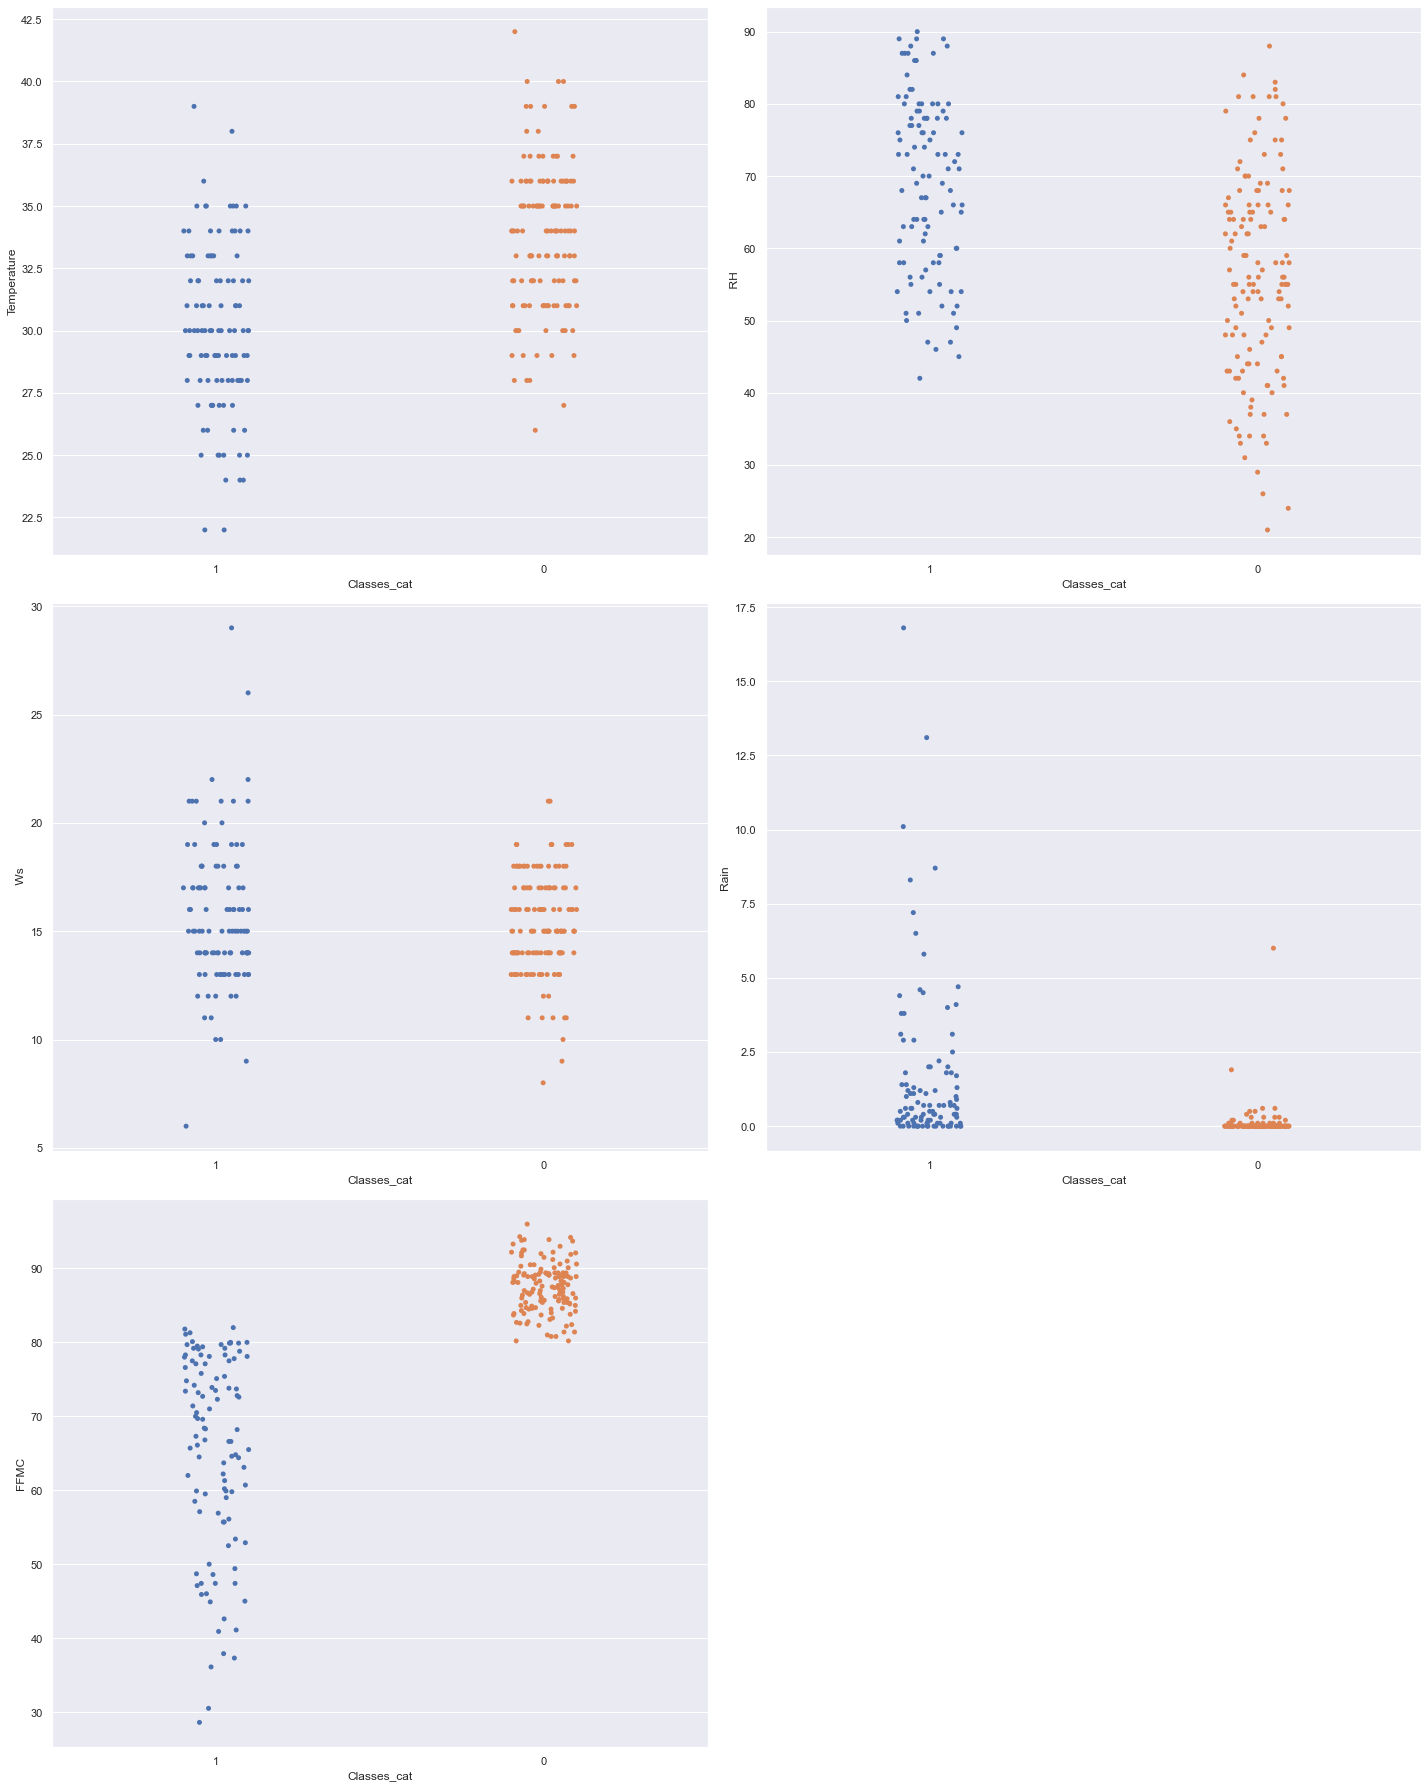

In [25]:
# now lets see the data distribution
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=5 :
        ax = plt.subplot(3,2,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [26]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [27]:
X_scaled

array([[-0.87065469, -0.34067323,  0.8932769 , -0.38165691, -0.84792702],
       [-0.87065469, -0.07035945, -0.88887652,  0.268642  , -0.9387086 ],
       [-1.69925426,  1.34878787,  2.31899963,  6.17135512, -2.14680201],
       ...,
       [-1.42305441,  1.68668009,  4.81401441, -0.13154194, -2.2306004 ],
       [-2.25165398, -0.54340856,  0.8932769 , -0.33163391,  0.12972082],
       [-2.25165398,  0.13237588, -0.17601515, -0.28161092, -0.73619584]])

In [28]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,2.235957,Temperature
1,2.113109,RH
2,1.122725,Ws
3,1.509005,Rain
4,2.862166,FFMC


In [29]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [30]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [89]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [68]:
# now predicting

In [31]:
y_pred = log_reg.predict(x_test)

In [32]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9836065573770492

In [33]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[34,  0],
       [ 1, 26]], dtype=int64)

In [34]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [35]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9836065573770492

In [36]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [37]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9714285714285714

In [38]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9855072463768115

In [39]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.9814814814814814

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

ValueError: y_true takes value in {'0', '1'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

E:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Classes_cat', ylabel='count'>

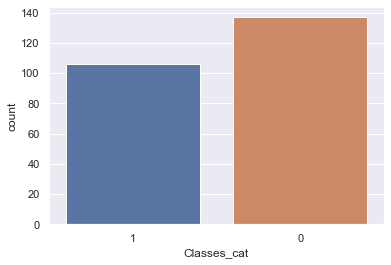

In [41]:
sns.countplot(df_copy['Classes_cat'])

In [ ]:
# Implementing undersampling strategy

In [42]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [43]:
# define oversampling strategy
SMOTE = SMOTE()
# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train, y_train)

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

In [46]:
model=SVC()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(x_test)

print("ROC AUC score for oversampled SMOTE data: ", roc_auc_score(y_test, pred_SMOTE))

ROC AUC score for oversampled SMOTE data:  0.9188453159041394
